In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the base directory and txpid values
base_dir = "~/RS/thinker/data/detect_log"
base_dir = os.path.expanduser(base_dir)
dxpids = {
    #"thinker-old": ("v18_thinker-0", "a_", ""),
    #"thinker": ("v18_thinker_2mds-0", "a_", ""),
    #"thinker-2m": ("v18_thinker_4mds-0", "a_", ""),
    #"thinker-4m": ("v18_thinker_8mds-0", "a_", ""),
    #"thinker": ("v18_thinker_2mds-0", "a_", ""),
    #"thinker-2m": ("v18_thinker_4srmds-0", "a_", ""),
    #"thinker-2m-sim": ("v18_thinker_4srmds_simple-0", "a_", ""),
    #"thinker-4m": ("v18_thinker_8srmds_2-0", "a_", ""),    
    #"mcts": ("v18_mcts-0", "a_", ""),    
    #"drc-old (hidden)": ("v18_drc_2-1", "a_", "_hs"),
    #"drc-old (model)": ("v18_drc_2-1", "a_", ""),
    #"drc-old (none)": ("v18_drc_2-1", "e_", "_none"),
    #"drc (hidden)": ("v18_drc_2mds_2-1", "a_", "_hs"),
    #"drc (model)": ("v18_drc_2mds_2-1", "a_", ""),
    #"drc (none)": ("v18_drc_2mds_2-1", "a_", "_none"),
    #"drc-2m (hidden)": ("v18_drc_4mds-1", "a_", "_hs"),
    #"drc-2m (model)": ("v18_drc_4mds-1", "a_", ""),
    #"drc-2m (none)": ("v18_drc_4mds-1", "a_", "_none"),
    #"drc-4m (hidden)": ("v18_drc_8mds-1", "a_", "_hs"),
    #"drc-4m (model)": ("v18_drc_8mds-1", "a_", ""),
    #"drc-4m (none)": ("v18_drc_8mds-1", "a_", "_none"),
    #"mlp (hidden)": ("v18_mlp-0", "c_", "_hs"),
    #"mlp (model)": ("v18_mlp-0", "c_", ""),
    #"mlp (none)": ("v18_mlp-0", "c_", "_none"),
    #"drc-nof": ("v18_drc_nof-0", "a_", ""),
    #"drc-0.05rand": ("v18_drc_005rand-0", "a_", ""),
    "drc-0.25rand": ("v18_drc_025rand_2-0", "a_", ""),
    "drc-0.25rand-1": ("v18_drc_025rand_2-1", "a_", ""),
    #"thinker-0.05rand": ("v18_thinker_005rand_2-0", "a_", ""),
    "thinker-0.25rand": ("v18_thinker_025rand-0", "a_", ""),
    "thinker-0.25rand-1": ("v18_thinker_025rand-1", "a_", ""),
    #"drc-adv": ("v18_drc_2_confuse-0", "a_", ""),
    #"thinker-adv": ("v18_thinker_confuse-0", "a_", ""),
        }

txpids = ["1k", "2k", "5k", "10k", "20k",]# "50k"]
data_sizes = [1000, 2000, 5000, 10000, 20000,]# 50000]


# Initialize data structures to hold the accuracy and F1 scores
acc_data = {dxpid: [] for dxpid in dxpids}
f1_data = {dxpid: [] for dxpid in dxpids}

# Load the data
for dxpid, file_names in dxpids.items():
    for txpid, data_size in zip(txpids, data_sizes):
        base_path = os.path.join(base_dir, file_names[0], "net")
        if not os.path.exists(base_path):
            base_path = os.path.join(base_dir, file_names[0])
        stats_path = os.path.join(base_path, file_names[1]+txpid+file_names[2], "stats.npy")
        # Check if the file exists to avoid errors
        if os.path.exists(stats_path):
            stats = np.load(stats_path, allow_pickle=True)
            last_record = stats[-1]  # Get the last item in the list
            # Extract "test\acc" and "test\f1" and append to the respective lists
            acc_data[dxpid].append(last_record["test/acc"])
            f1_data[dxpid].append(last_record["test/f1"])
        else:
            print(f"File not found: {stats_path}")
            acc_data[dxpid].append(None)
            f1_data[dxpid].append(None)

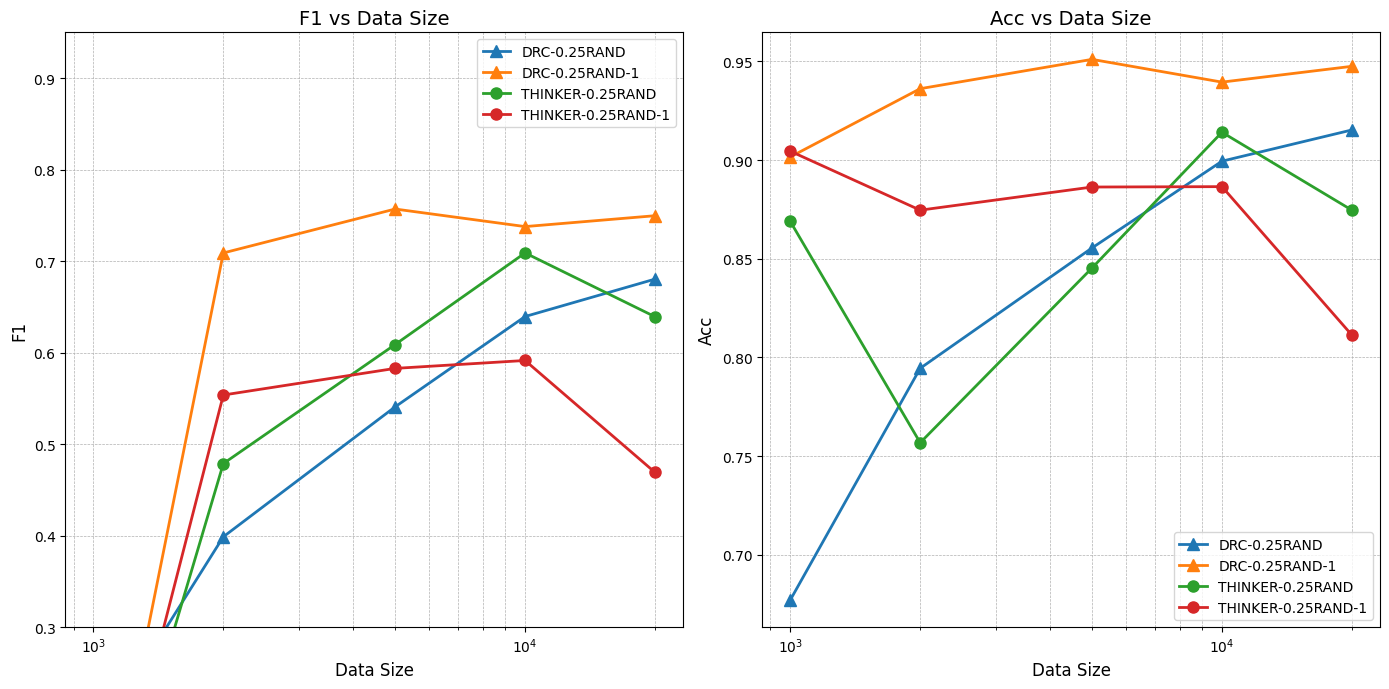

In [47]:
# Plotting
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
for i, dxpid in enumerate(dxpids):
    if "thinker" in dxpid:
        marker = 'o'
    elif "mcts" in dxpid:
        marker = 's'
    elif "drc" in dxpid:
        marker = '^'
    else:
        marker = 'D'
    plt.plot(data_sizes, f1_data[dxpid], label=f'{dxpid.upper()}', marker=marker, linestyle="-", linewidth=2, markersize=8)
plt.title('F1 vs Data Size', fontsize=14)
plt.xlabel('Data Size', fontsize=12)
plt.ylabel('F1', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xscale('log')
plt.ylim([0.3, 0.95])

# F1 score plot
plt.subplot(1, 2, 2)
for i, dxpid in enumerate(dxpids):
    if "thinker" in dxpid:
        marker = 'o'
    elif "mcts" in dxpid:
        marker = 's'
    elif "drc" in dxpid:
        marker = '^'
    else:
        marker = 'D'
    plt.plot(data_sizes, acc_data[dxpid], label=f'{dxpid.upper()}', marker=marker, linestyle="-", linewidth=2, markersize=8)
plt.title('Acc vs Data Size', fontsize=14)
plt.xlabel('Data Size', fontsize=12)
plt.ylabel('Acc', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xscale('log')

plt.show()